<a href="https://colab.research.google.com/github/Shreyansh452/AI-ML-Projects/blob/main/Imotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Sat Mar 15 08:25:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install ultralytics

In [6]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import Image

In [10]:
!curl -L "https://universe.roboflow.com/ds/LwsSyAZ75V?key=OqeKcgji7F" > roboflow.zip
!unzip roboflow.zip -d roboflow_dataset
!rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   2457      0 --:--:-- --:--:-- --:--:--  2461
100 54.5M  100 54.5M    0     0  8474k      0  0:00:06  0:00:06 --:--:-- 11.7M
Archive:  roboflow.zip
  inflating: roboflow_dataset/README.dataset.txt  
  inflating: roboflow_dataset/README.roboflow.txt  
  inflating: roboflow_dataset/data.yaml  
   creating: roboflow_dataset/test/
   creating: roboflow_dataset/test/images/
 extracting: roboflow_dataset/test/images/1-10-_jpg.rf.fb28603ab890d1d10cfdd85b6c7734ba.jpg  
 extracting: roboflow_dataset/test/images/1-2-_jpg.rf.1930e7f3cb47d2c3139068634c1ace54.jpg  
 extracting: roboflow_dataset/test/images/1-2-_jpg.rf.6b51b38aefa60c746cb6befbe0d4d7ca.jpg  
 extracting: roboflow_dataset/test/images/1-2-_jpg.rf.8281585f26954c646690a1a431135d70.jpg  
 extracting: roboflow_dataset/test/images/1-3-_jpg.rf.d8f82d7192

In [11]:
import os

dataset_path = "roboflow_dataset"
print(os.listdir(dataset_path))  # List dataset contents


['valid', 'test', 'README.dataset.txt', 'train', 'data.yaml', 'README.roboflow.txt']


In [16]:
!yolo task=detect mode=train data={dataset_path}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640


100% 5.35M/5.35M [00:00<00:00, 312MB/s]
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=roboflow_dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

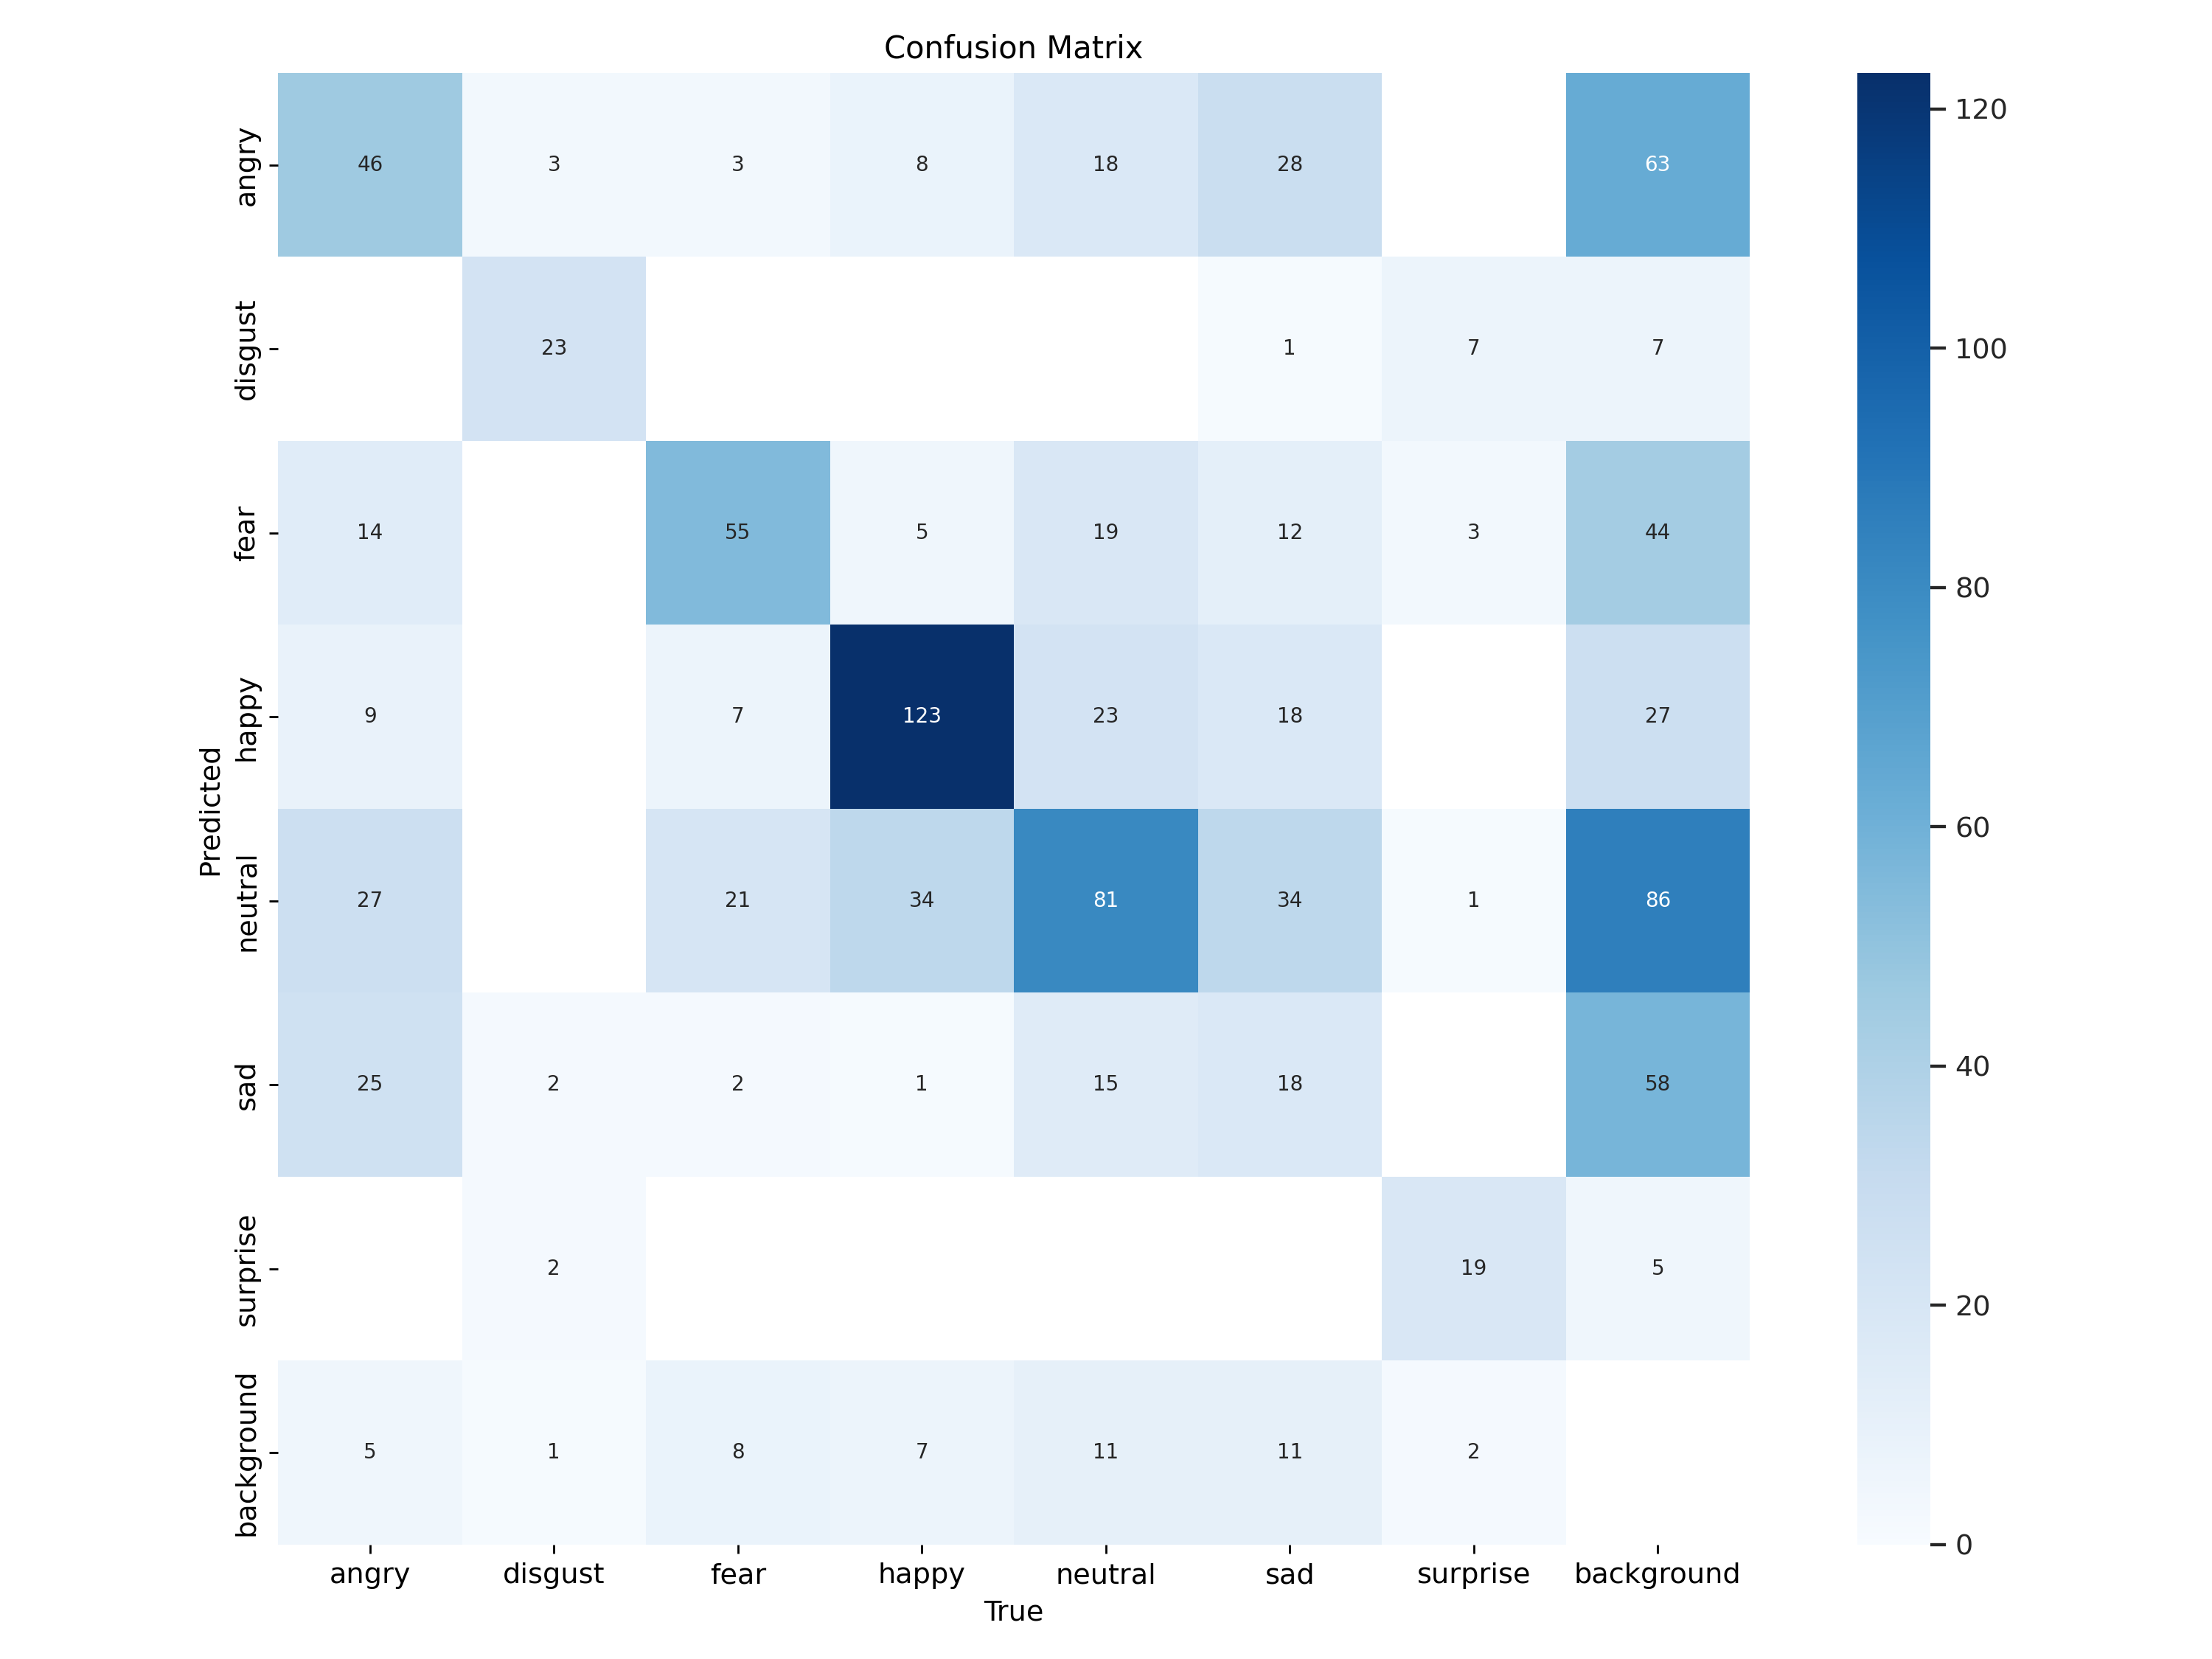

In [17]:
Image("/content/runs/detect/train/confusion_matrix.png", width = 600)

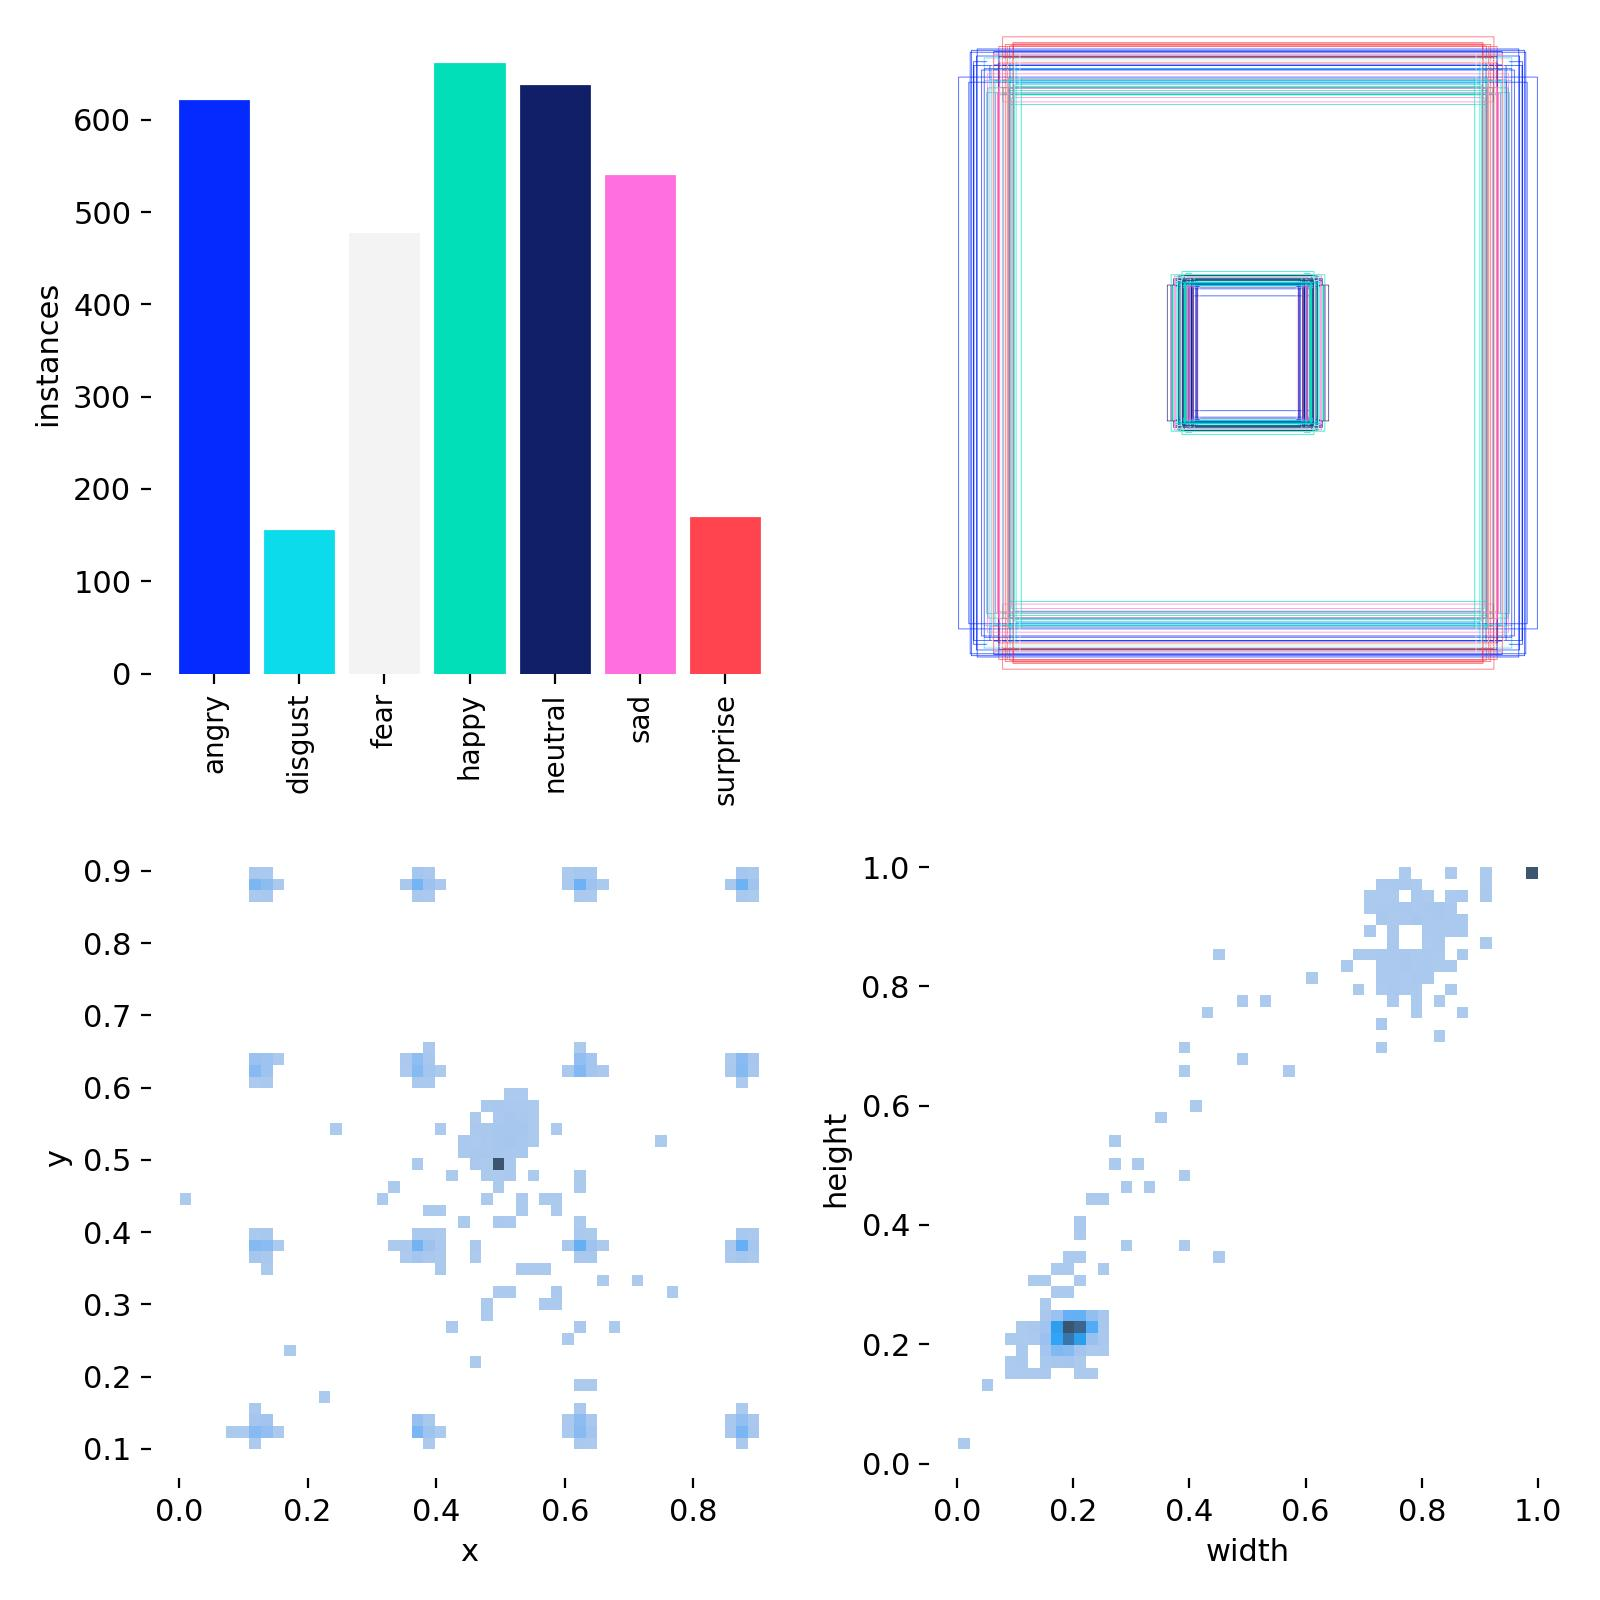

In [18]:
Image("/content/runs/detect/train/labels.jpg", width = 600)

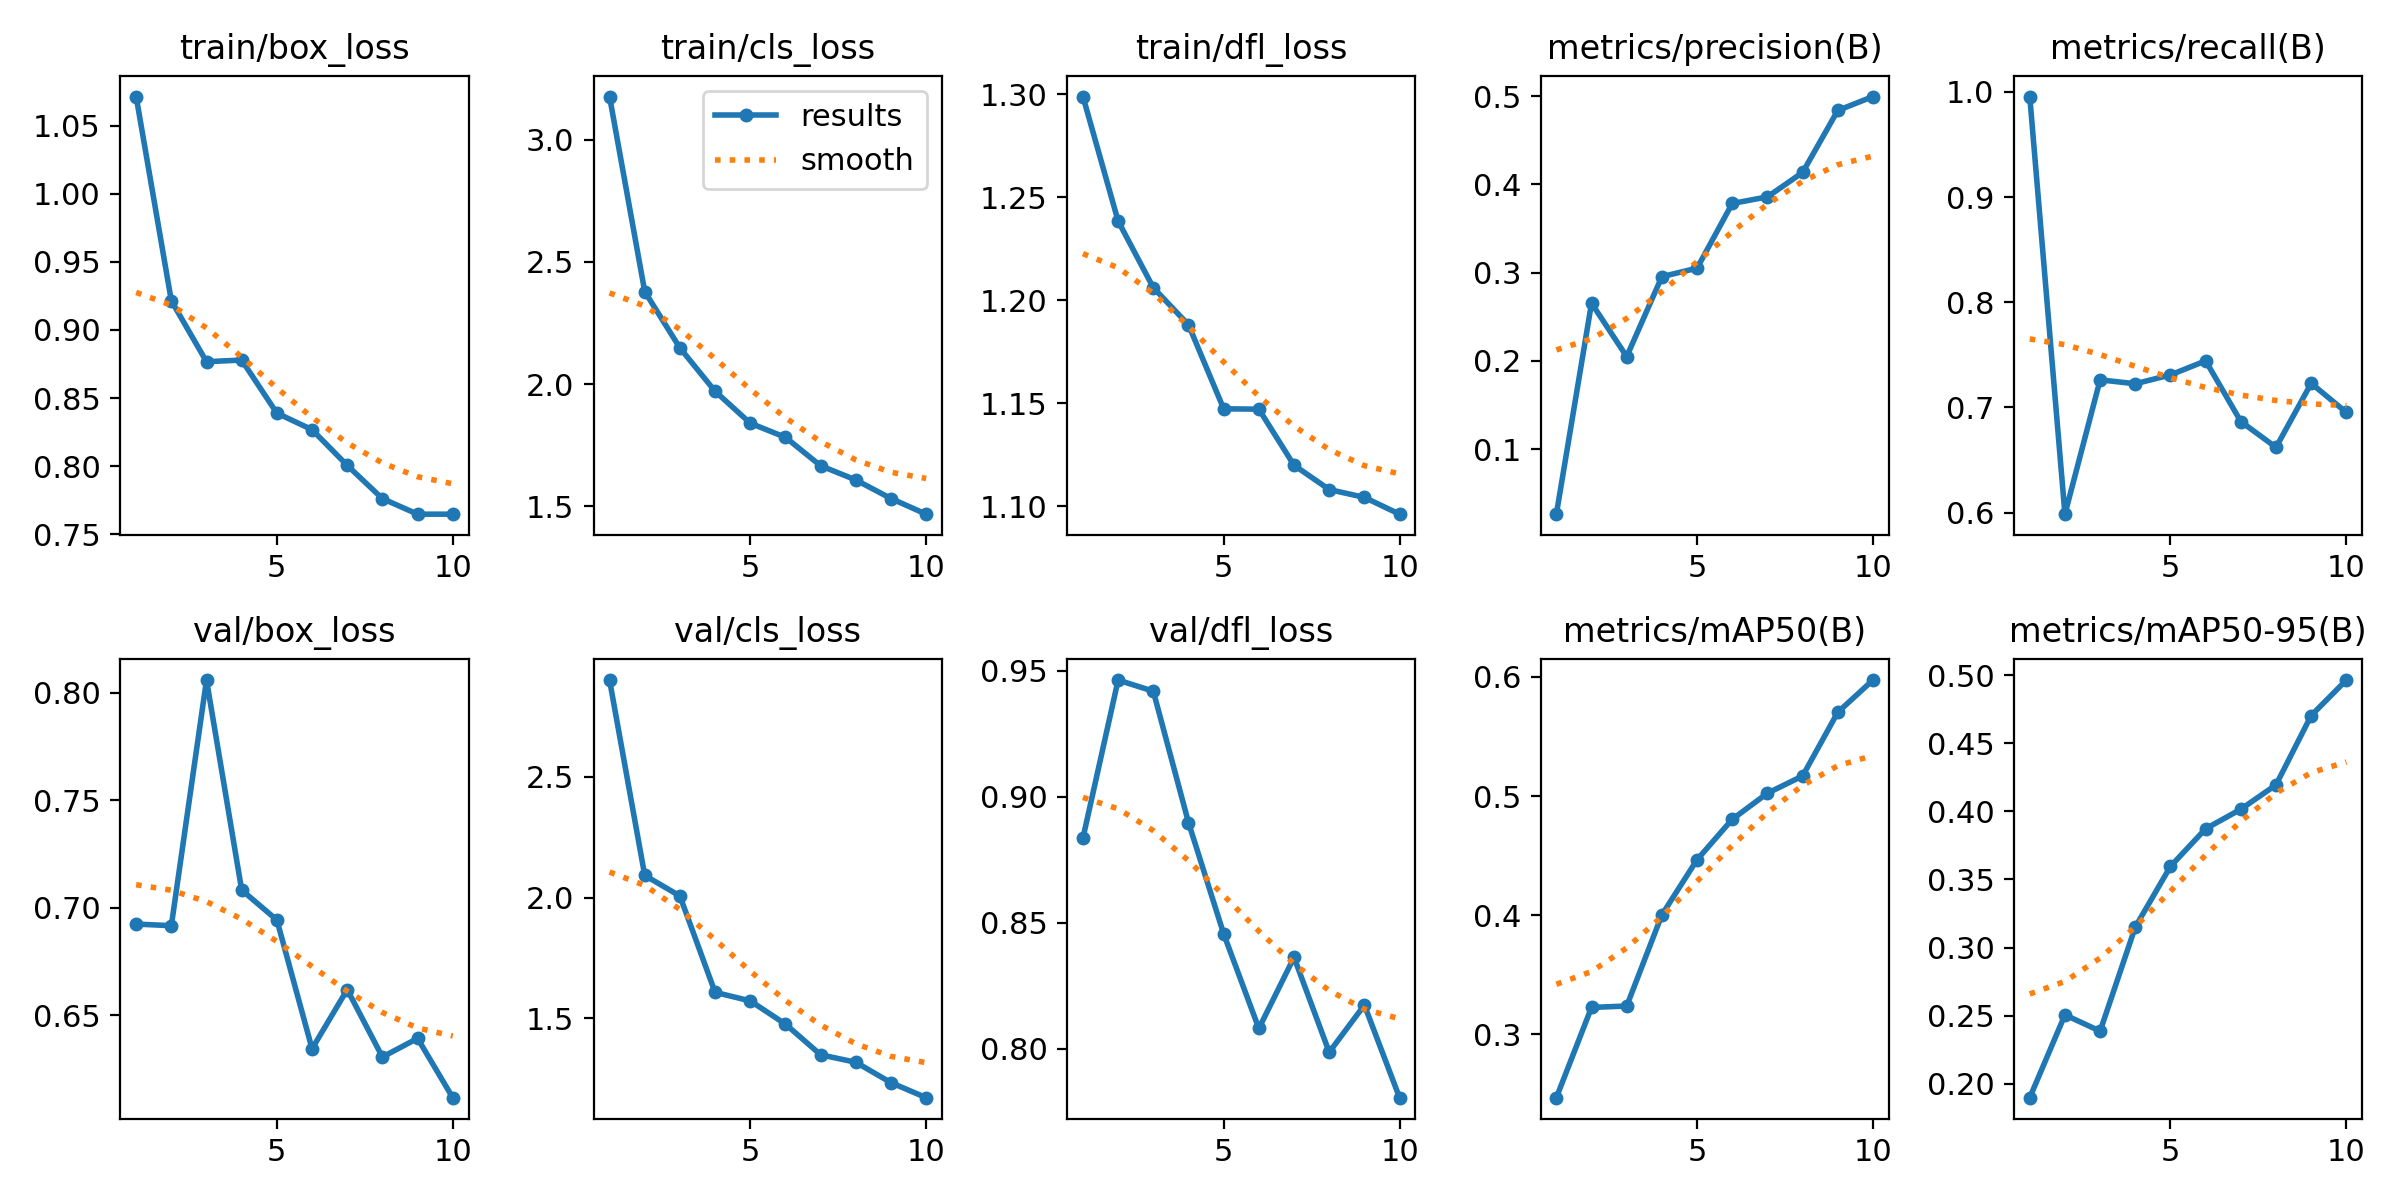

In [19]:
Image("/content/runs/detect/train/results.png", width = 600)

In [20]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset_path}/data.yaml

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/roboflow_dataset/valid/labels.cache... 178 images, 0 backgrounds, 0 corrupt: 100% 178/178 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:03<00:00,  3.02it/s]
                   all        178        752      0.492       0.71      0.597      0.496
                 angry         62        126      0.331      0.603      0.425      0.318
               disgust         31         31      0.583      0.811      0.803      0.786
                  fear         41         96      0.391      0.719       0.52      0.366
                 happy         55        178       0.61      0.781      0.781      0.576
               neutral         44        167      0.364      0.802      0.482      0.349
                   sad         56        122 

In [21]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset_path}/test/images save=True

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/183 /content/roboflow_dataset/test/images/1-10-_jpg.rf.fb28603ab890d1d10cfdd85b6c7734ba.jpg: 640x640 1 angry, 12.6ms
image 2/183 /content/roboflow_dataset/test/images/1-2-_jpg.rf.1930e7f3cb47d2c3139068634c1ace54.jpg: 640x640 1 angry, 8.7ms
image 3/183 /content/roboflow_dataset/test/images/1-2-_jpg.rf.6b51b38aefa60c746cb6befbe0d4d7ca.jpg: 640x640 1 angry, 8.3ms
image 4/183 /content/roboflow_dataset/test/images/1-2-_jpg.rf.8281585f26954c646690a1a431135d70.jpg: 640x640 1 angry, 11.5ms
image 5/183 /content/roboflow_dataset/test/images/1-3-_jpg.rf.d8f82d7192534b0f84c3e253fe66340d.jpg: 640x640 1 angry, 9.4ms
image 6/183 /content/roboflow_dataset/test/images/1-5-_jpg.rf.0eeadafd6dfd63b66772e5841d8f357e.jpg: 640x640 1 angry, 8.0ms
image 7/183 /content/roboflow_dataset/test/images/1-5-_jpg.rf.3315aa7f2521c3af1ae6deb3e296648

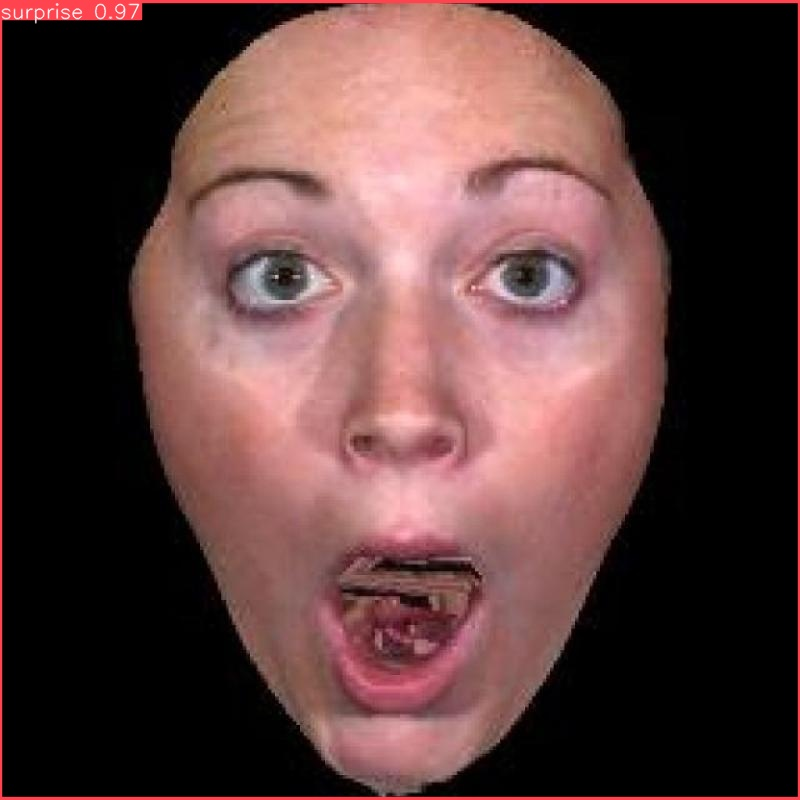

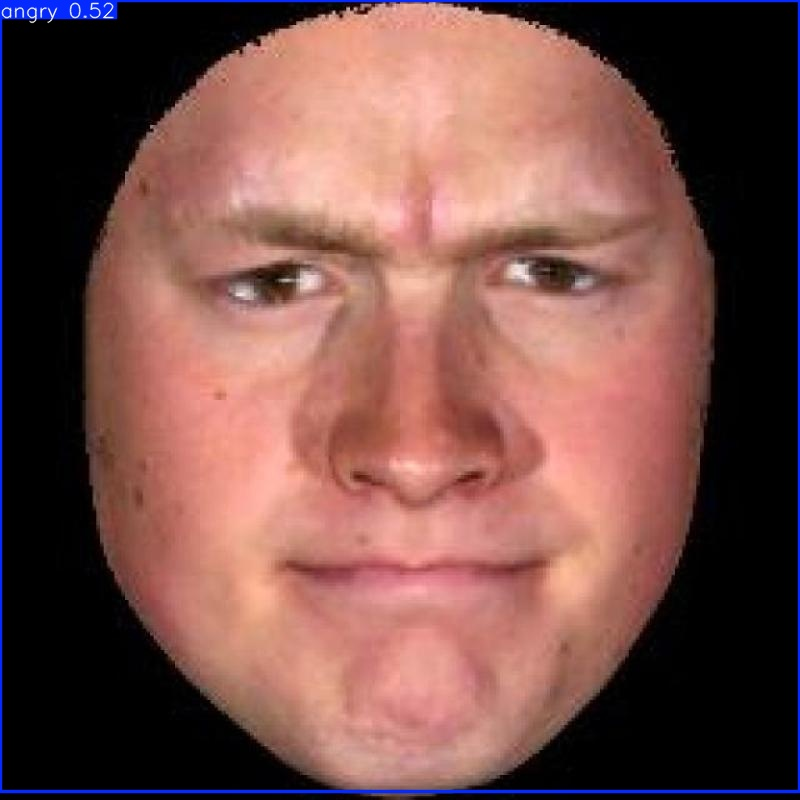

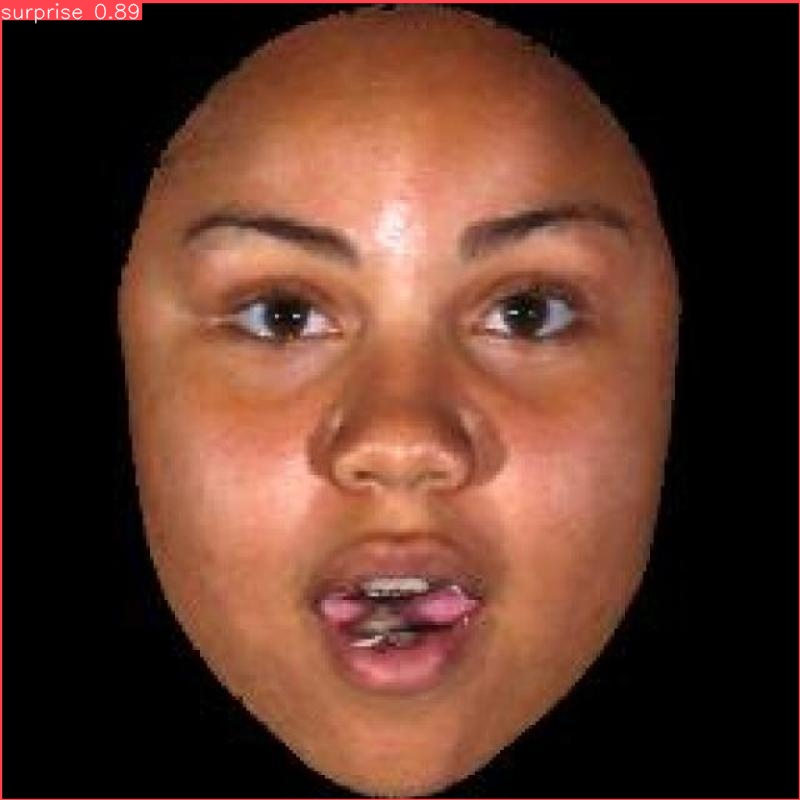

In [26]:
import glob
import os
from IPython.display import Image, display
# Import IPython.display.Image as IPyImage
from IPython.display import Image as IPyImage

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img, width=600))
  print("\n")